# 章節 9：二維空間

## 9.3 三角函數（Trigonometry）

現在我們需要一個似然性函數(likelihood)，也就是給定敵人的位置，我們想要知道漆彈沿著牆面打到任何位置的可能性。

作為一個簡單的模型，想像敵人是一個旋轉的砲台，每個方向射擊的機率都一樣。在這種情況下，他最有可能打到牆面 alpha 的位置，比較少機會打到遠離 alpha。

用一點三角函數，我們可以計算打到牆面上任何位置的機率。想像敵人射擊的角度 θ；子彈打在牆面 x 的位置，所以：

$$ x - \alpha = \beta tan\theta $$

所以給定子彈在牆面的位置，我們可以計算 θ：

$$ \theta = \arctan (\frac{x - \alpha}{\beta}) $$

對第一個式子的 θ 微分，得到：

$$ \frac{dx}{d\theta}=\frac{\beta}{\cos^{2}\theta} $$

微分的結果這邊稱作 「掃射速度」，也就是隨著 θ 增加時，牆面被擊中位置的速度。

擊中給定的牆上位置的機率與「掃射速度」成反比，也就是掃射速度越快，牆上某位置被打到的機率越小。

如果我們知道敵人的座標以及牆上的漆彈位置，我們可以計算掃射速度：

In [12]:
import math

def StrafingSpeed(alpha, beta, x):
    # alpha, beta：敵人的座標
    # x：牆上漆彈的位置
    
    
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    
    # 回傳 x 對 theta 的微分
    return speed

現在我們可以計算牆上任何位置的機率分佈。MakeLocationPmf 方法：

In [13]:
import thinkbayes as tb

# 計算每個位置被漆彈打到的機率，跟掃射速度成反比
def MakeLocationPmf(alpha, beta, locations):
    # alpha, beta：敵人的座標
    # locations：一序列牆上漆彈的位置

    pmf = tb.Pmf()
    for x in locations:
        prob = 1.0 / StrafingSpeed(alpha, beta, x)
        pmf.Set(x, prob)
        
    pmf.Normalize()
    # 回傳漆彈位置與其對應的機率
    return pmf

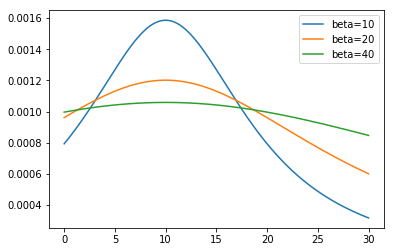

In [30]:
import matplotlib.pyplot as plt
import numpy as np


def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

    
betas = [10, 20, 40]
x = np.linspace(0, 30, 1000)
alpha = 10

legends = []
for beta in betas:
    pmf = MakeLocationPmf(alpha, beta, x)
    plot_dist(pmf)
    legends.append("beta=%d" % beta)
    
plt.legend(legends)
plt.show()

上圖顯示當 alpha = 10, beta 是變動的情形下牆上位置的機率分佈圖（也就是假設敵人上下移動，看下方示意圖）。

對不同的 beta 值漆彈最有可能出現在牆上的位置是 x=10；當 beta 值增加時，機率分佈也較為平坦。

![場地示意圖](paintball.png)